## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression is predicting a numberic outcome and classification is predicting a categorical outcome.
2. A confusion table cross tabulates the predicted and true values. The table is made up of the predicted values as columns along the top and true values along the side. This table helps us understand the success and failure points of the model. For example if the model predicts it as negative and it is actually positive this is a false negative and when the model predicts it as positive and it is actually negative this is a false positive. This helps us understand in which scenarios the model is making the wrong decisions.
3. The SSE quantifies the error in a specific model by summing how far each of the predicted values are from the true values.
4. Overfitting is when your model is too complex to reliably explain the phenomenon you are interested in (in KNN when k is too big), underfitting is when your model is too simple to reliably explain the phenomenon you are interested in ( in KNN when k is too small).
5. Splitting the data into training and testing sets improve the model because it allows you to first create the model based on data and train it to make the correct decisions, and then you can evaluate its performance on never before seen data to see if any adjustments to the model are needed. Choosing k by evaluating where SSE is the lowest allows us to optimize the model and choose a k where the model is performing at its best instead of choosing a random k value.
6. When making predictions with classification models, we can output either a single class label or a probability distribution over all classes. Class labels are simple and actionable, providing a clear decision that's easy to evaluate and communicate. However, they omit information about the model's confidence. This makes it impossible to adjust decisions for different contexts or identify borderline cases that might need further review.
Probability distributions keep the model's uncertainty, showing how confident it is in each possible class. This allows you to tune decision thresholds based on which errors you are willing to risk. However, they require more interpretation and decision making after the model is done.
The best choice depends on your application class labels work well for  simple, actionable decisions, and probabilities work well when you want to incorporate uncertainty for further processing.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

k = 3, MSE = 133,487,993.50


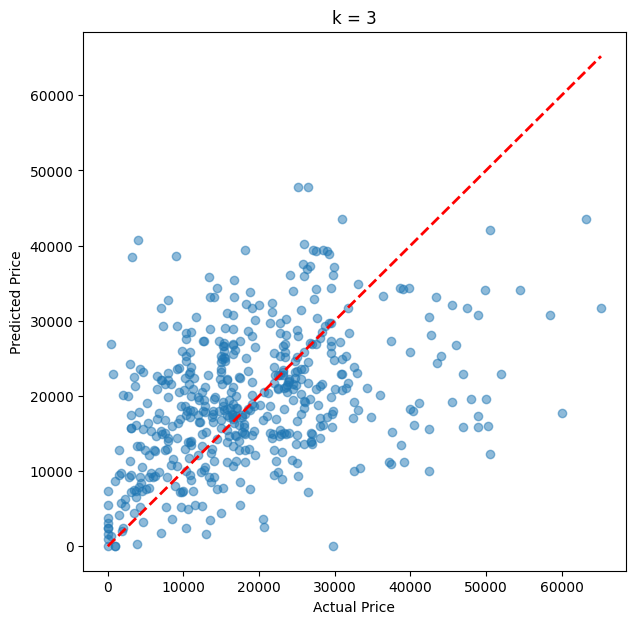

k = 10, MSE = 111,588,702.62


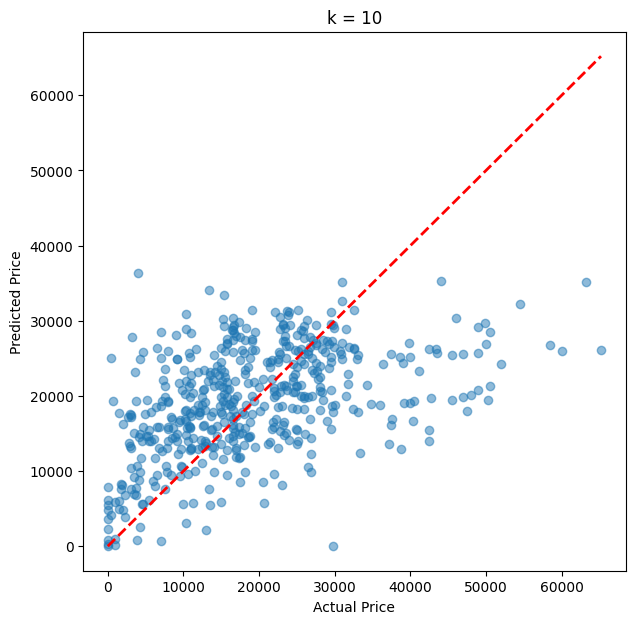

k = 25, MSE = 104,962,784.87


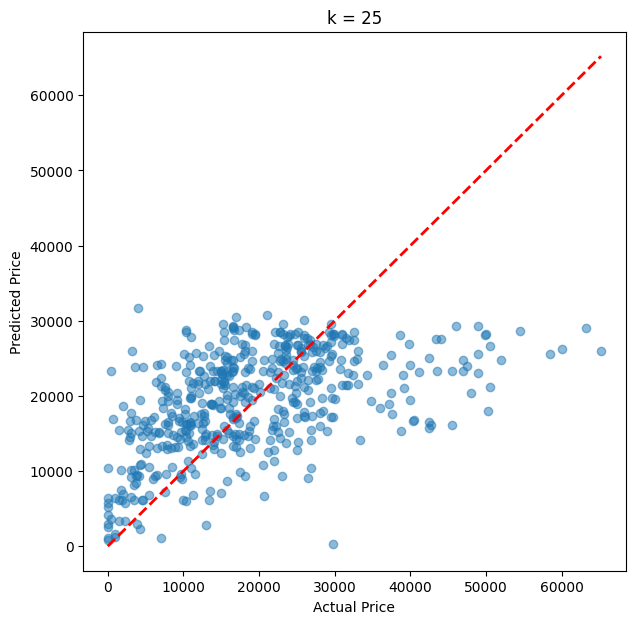

k = 50, MSE = 103,873,193.22


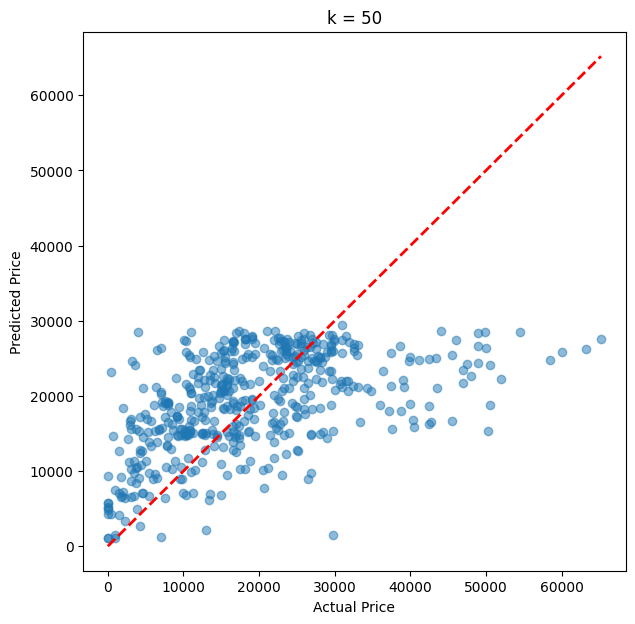

k = 100, MSE = 104,534,999.26


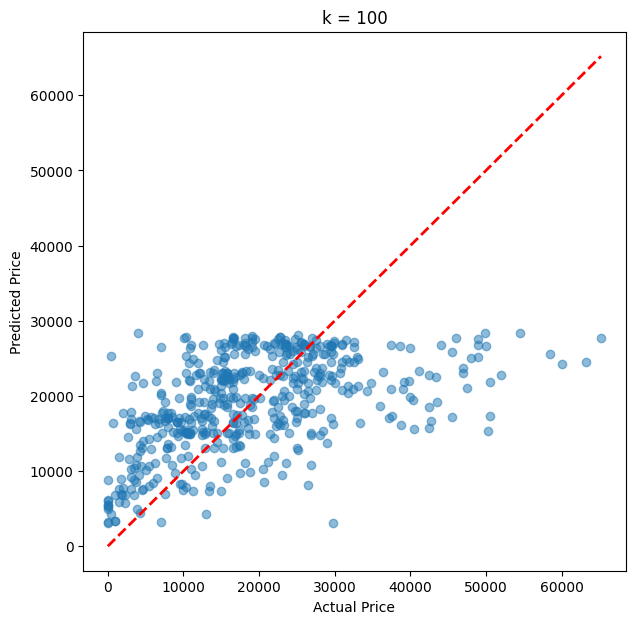

k = 300, MSE = 107,657,680.74


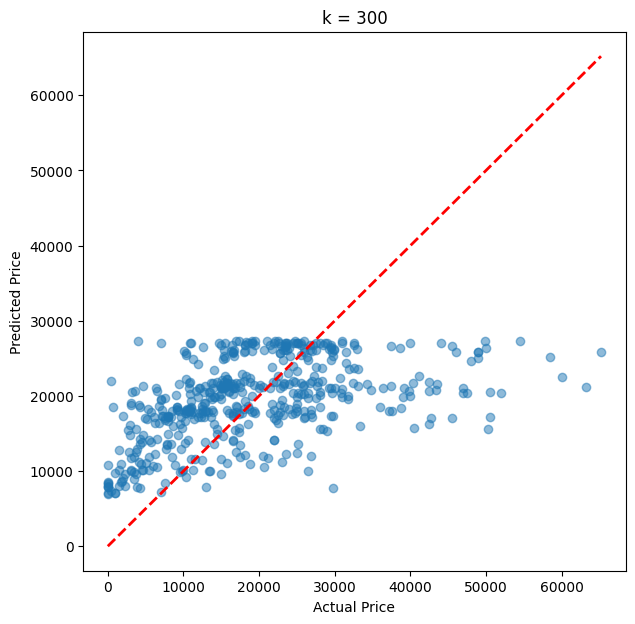

In [20]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('/content/USA_cars_datasets.csv', low_memory=False)

# Keep only the variables you need
df = df[['price', 'year', 'mileage']]

# Maxmin normalize
def maxmin(z):
    w = (z - np.min(z)) / (np.max(z) - np.min(z))
    return w

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

X = df[['year', 'mileage']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

# Try different k values
k_values = [3, 10, 25, 50, 100, 300]

for k in k_values:
    # Train model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    print(f"k = {k}, MSE = {mse:,.2f}")

    # Scatter plot: predicted vs actual
    plt.figure(figsize=(7, 7))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'k = {k}')
    plt.show()

1. The data is 2499 x 3 columns (after making it only price, year, mileage). I did not find any NAs.
2. I notice that as the value of k goes up until k=50 the MSE is decreasing. However after 50 the MSE increases until 300, likely a result of overfitting at the higher k values.
3. k=50 is the optimal k. This value of k has the lowest MSE before the model's MSE begins to increase to k=300 as overfitting occurs.
4. As mentioned before underiftting typically occurs at lower k values and overfitting at higher k values due to models being either too simple or too complex. In this example seeing overfitting is very obvious. One's instinct likely is that the higher k values mean less MSE, however it can be seen that after k=50 at k=100 and k=300 overfitting begins to occur and the error increases on the model making it less accurate. Further, underfitting is likely occuring at k values of 3 and 10 where there is a much higher MSE due to too much simplicity in the model and too big groupings of neighbors that actually are not similar.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

Dataset shape: (101, 18)

First few rows:
     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   
5   buffalo     1         0     0     1         0        0         0        1   
6      calf     1         0     0     1         0        0         0        1   
7      carp     0         0     1     0         0        1         0        1   
8   catfish     0         0     1     0         0        1         1        1   
9      cavy     1         0     0     1         0        0         0        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsi

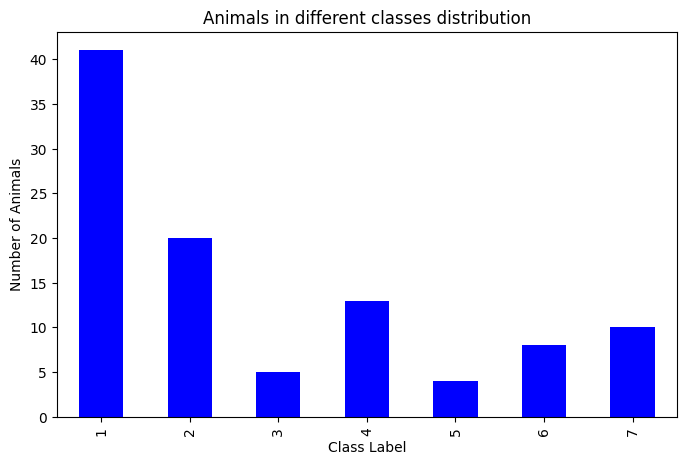


Statistics of features:
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
st

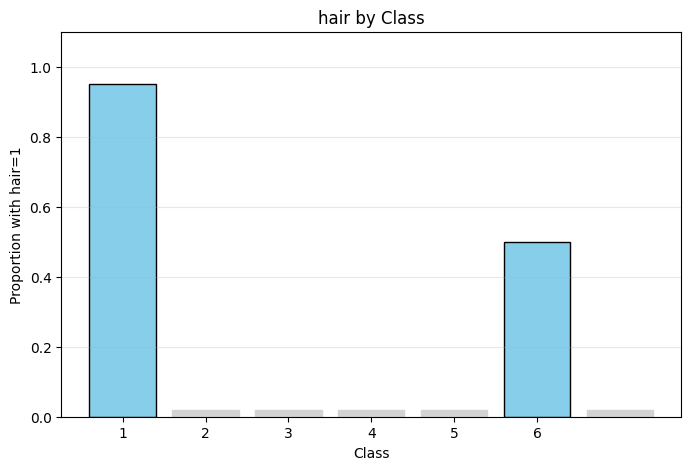

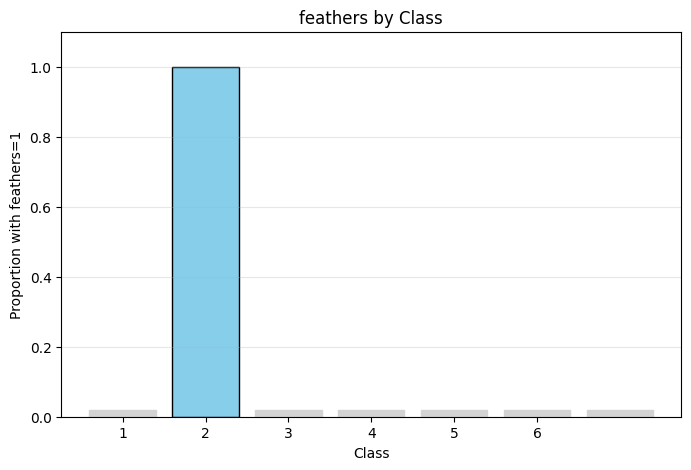

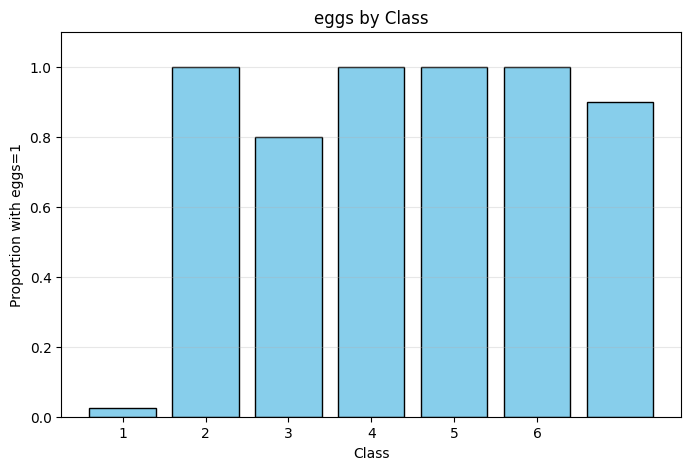

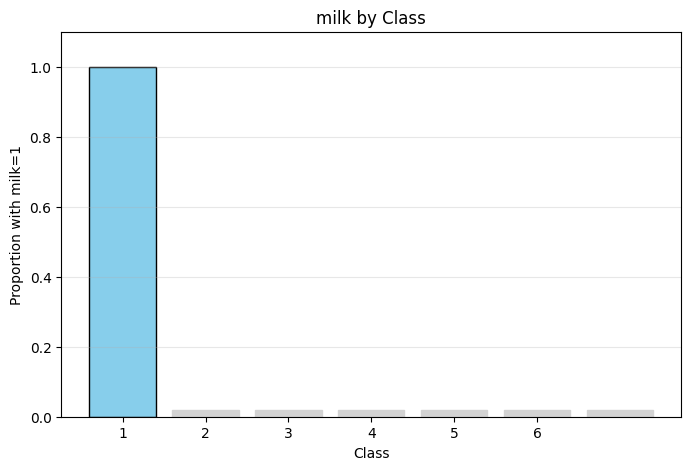

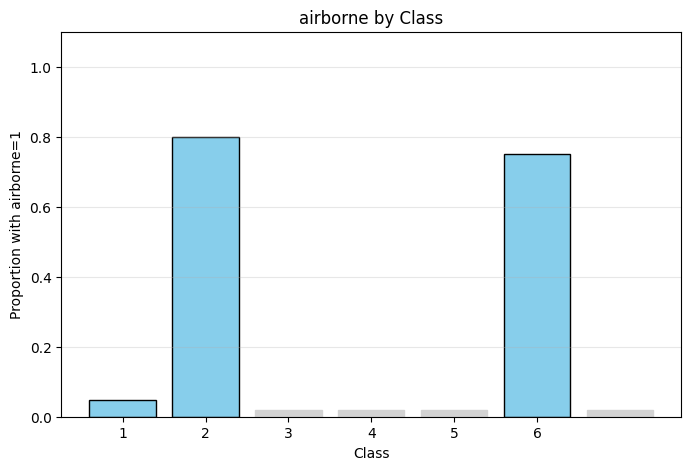

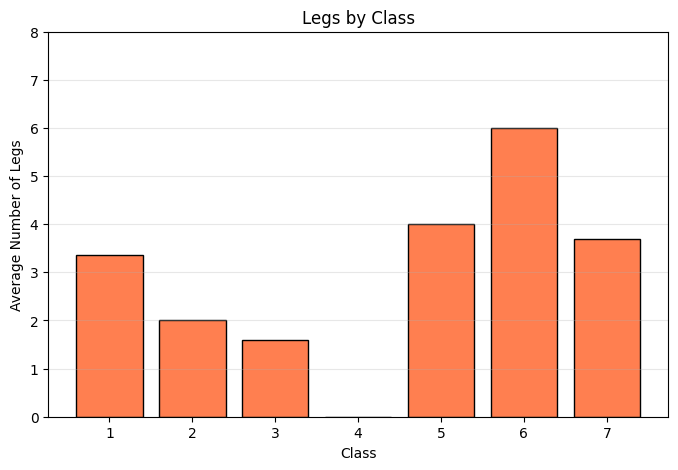


Features most correlated with class:
backbone    0.828845
milk        0.723683
eggs        0.661825
tail        0.631830
hair        0.562384
catsize     0.521030
breathes    0.519308
toothed     0.471527
aquatic     0.326639
venomous    0.321476
dtype: float64
Optimal k = 1
Max accuracy = 1.000


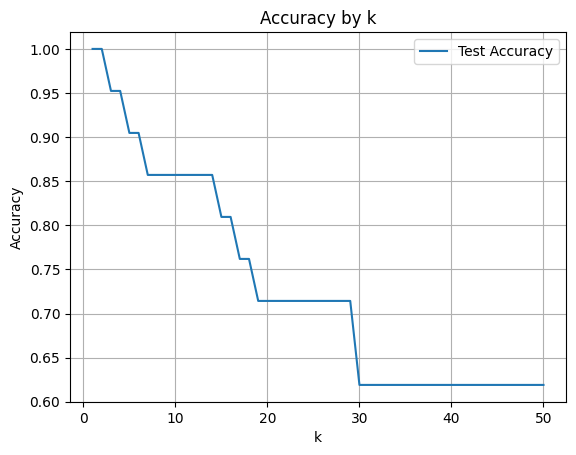

Trial 1: k* = 1, Accuracy = 1.000
Trial 2: k* = 1, Accuracy = 1.000
Trial 3: k* = 1, Accuracy = 1.000
Trial 4: k* = 1, Accuracy = 1.000
Trial 5: k* = 1, Accuracy = 1.000


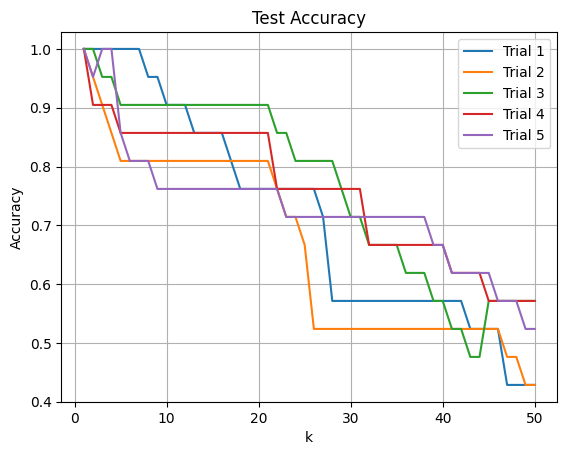

Test Accuracy with k=1: 0.941
Confusion Matrix:
            Predicted 1  Predicted 2  Predicted 3  Predicted 4  Predicted 5  \
Actually 1           24            0            0            0            0   
Actually 2            0            6            0            0            0   
Actually 3            0            0            1            1            1   
Actually 4            0            0            0            5            0   
Actually 5            0            0            0            0            3   
Actually 6            0            0            0            0            0   
Actually 7            0            0            0            0            0   

            Predicted 6  Predicted 7  
Actually 1            0            0  
Actually 2            0            0  
Actually 3            0            0  
Actually 4            0            0  
Actually 5            0            0  
Actually 6            5            0  
Actually 7            1            4  

Miscla

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the data
df = pd.read_csv('/content/zoo.csv')

# Basic overview
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))

# 1. Look at what animals are in each class
print("\nAnimals in each class:")
for class_num in sorted(df['class'].unique()):
    animals = df[df['class'] == class_num]['animal']
    print(f"\nClass {class_num}: ({len(animals)} animals)")
    print(animals.tolist())

# 2. How big are the classes?
print("\nClass Sizes:")
print(df['class'].value_counts().sort_index())

#make a histogram to visualize class sizes
plt.figure(figsize=(8, 5))
df['class'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.xlabel('Class Label')
plt.ylabel('Number of Animals')
plt.title('Animals in different classes distribution')
plt.show()

# 3. Feature variation
feature_cols = [col for col in df.columns if col not in ['animal', 'class']]

print(f"\nStatistics of features:")
print(df[feature_cols].describe())

# Which features might be most predictive?
print("\nCorrelation with class number:")
correlations = df[feature_cols].corrwith(df['class']).abs().sort_values(ascending=False)
print(correlations)


#MORE EDA



# Binary features - bar plots showing proportion
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne']

for feature in binary_features:
    class_means = df.groupby('class')[feature].mean()

    plt.figure(figsize=(8, 5))
    bars = plt.bar(class_means.index, class_means.values, color='skyblue', edgecolor='black')

    # Make 0 bars slightly visible
    for i, bar in enumerate(bars):
        if bar.get_height() == 0:
            bar.set_height(0.02)
            bar.set_color('lightgray')

    plt.xlabel('Class')
    plt.ylabel(f'Proportion with {feature}=1')
    plt.title(f'{feature} by Class')
    plt.xticks(range(1, 7))
    plt.ylim(0, 1.1)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# Legs is different - show average number of legs per class
class_legs = df.groupby('class')['legs'].mean()

plt.figure(figsize=(8, 5))
plt.bar(class_legs.index, class_legs.values, color='coral', edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Average Number of Legs')
plt.title('Legs by Class')
plt.xticks(range(1, 8))
plt.ylim(0, 8)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Correlation with class
feature_cols = [col for col in df.columns if col not in ['animal', 'class']]
correlations = df[feature_cols].corrwith(df['class']).abs().sort_values(ascending=False)
print("\nFeatures most correlated with class:")
print(correlations.head(10))

#picking k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
y = df['class']
X = df.drop(['animal', 'class'], axis=1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

N_test = len(y_test)

# Solve for k that maximizes accuracy
k_bar = 50  # Number of k's to try
Acc = []  # Store accuracy

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)  # Create model
    fitted_model = model.fit(X_train, y_train)  # Train on training data
    y_hat = fitted_model.predict(X_test)  # Predict on test set
    Acc.append(np.sum(y_hat == y_test) / N_test)  # Accuracy on test data

Acc_max = np.max(Acc)  # Find highest accuracy
max_index = np.where(Acc == Acc_max)  # Find indices with max accuracy
k_star = max_index[0][0] + 1  # Optimal k
print(f"Optimal k = {k_star}")
print(f"Max accuracy = {Acc_max:.3f}")

# Plot
plt.plot(np.arange(1, k_bar+1), Acc, label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Accuracy by k')
plt.legend()
plt.grid(True)
plt.show()

#it says k=1 is the best but how consistent is this?

# Prepare data
y = df['class']
X = df.drop(['animal', 'class'], axis=1)

for trial in range(5):
    ## Split the sample:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    N_train = len(y_train)
    N_test = len(y_test)

    ## Solve for k that maximizes accuracy:
    k_bar = 50  # Number of k's to try
    Acc = []  # Store accuracy

    for k in range(k_bar):
        model = KNeighborsClassifier(n_neighbors=k+1)  # Create model
        fitted_model = model.fit(X_train, y_train)  # Train on training data
        y_hat = fitted_model.predict(X_test)  # Predict on test set
        Acc.append(np.sum(y_hat == y_test) / N_test)  # Accuracy on testing data

    Acc_max = np.max(Acc)  # Find highest accuracy
    max_index = np.where(Acc == Acc_max)  # Find indices with max accuracy
    k_star = max_index[0][0] + 1  # Optimal k
    print(f"Trial {trial+1}: k* = {k_star}, Accuracy = {Acc_max:.3f}")
    plt.plot(np.arange(1, k_bar+1), Acc, label=f'Trial {trial+1}')

## Accuracy plot:
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title('Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# NOW use k*=1 and see how model performs on test set

k_star = 1

# Train final model on last split (or create new split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Fit model with optimal k
model = KNeighborsClassifier(n_neighbors=k_star)
fitted_model = model.fit(X_train, y_train)

# Predict on test set
y_pred = fitted_model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Test Accuracy with k={k_star}: {accuracy:.3f}")

# Create confusion matrix
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as a nice table
cm_df = pd.DataFrame(cm,
                     index=[f'Actually {i}' for i in range(1, 8)],
                     columns=[f'Predicted {i}' for i in range(1, 8)])
print("Confusion Matrix:")
print(cm_df)

# Analyze misclassifications
print("\nMisclassified examples:")
misclassified = X_test[y_pred != y_test]
actual_classes = y_test[y_pred != y_test]
predicted_classes = y_pred[y_pred != y_test]

for i in range(len(misclassified)):
    actual = actual_classes.iloc[i]
    predicted = predicted_classes[i]
    print(f"Actual: Class {actual}, Predicted: Class {predicted}")

    # Show which animals are in these classes to interpret
    print(f"  Class {actual} animals: {df[df['class']==actual]['animal'].tolist()[:3]}")
    print(f"  Class {predicted} animals: {df[df['class']==predicted]['animal'].tolist()[:3]}")

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.